## Online Popularity Data Set 

From UC Irvine Machine Learning Repository(Fernandes et al. 2015)

https://archive.ics.uci.edu/ml/machine-learning-databases/00332/

````The dataset includes 60 features of a set of 39,797 news articles published by Mashable over a period of 2 years.````

---


***Feature Scaling*** - is usefull in situations where a set of input feautes differs wildly in scale.

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import sklearn.preprocessing as preproc

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('../data/OnlineNewsPopularity/OnlineNewsPopularity.csv', delimiter=', ')
df[:3]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


url  timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...      731.0   
1  http://mashable.com/2013/01/07/ap-samsung-spon...      731.0   
2  http://mashable.com/2013/01/07/apple-40-billio...      731.0   

   n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0            12.0             219.0         0.663594               1.0   
1             9.0             255.0         0.604743               1.0   
2             9.0             211.0         0.575130               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs   ...    \
0                  0.815385        4.0             2.0       1.0   ...     
1                  0.791946        3.0             1.0       1.0   ...     
2                  0.663866        3.0             1.0       1.0   ...     

   min_positive_polarity  max_positive_polarity  avg_negative_polarity  \
0               0.100000                    0.7              -0.350000   
1               0.033333                    0.7              -0.118750   
2               0.100000                    1.0              -0.466667   

   min_negative_polarity  max_negative_polarity  title_subjectivity  \
0                 -0.600              -0.200000                 0.5   
1                 -0.125              -0.100000                 0.0   
2                 -0.800              -0.133333                 0.0   

   title_sentiment_polarity  abs_title_subjectivity  \
0                   -0.1875                     0.0   
1                    0.0000                     0.5   
2                    0.0000                     0.5   

   abs_title_sentiment_polarity  shares  
0                        0.1875     593  
1                        0.0000     711  
2                        0.0000    1500  

[3 rows x 61 columns]

In [3]:
# look at the original data - the number of words in an article

df['n_tokens_content'].values

array([219., 255., 211., ..., 442., 682., 157.])

---
#### Min-max Scaling

In [4]:
# Min-max scaling

df['minmax'] = preproc.minmax_scale(df[['n_tokens_content']])
df['minmax'].values

array([0.02584376, 0.03009205, 0.02489969, ..., 0.05215955, 0.08048147,
       0.01852726])

---
#### Standardization Scaling

In [5]:
# Standardization  - some outputs will be negative

df['standardized'] = preproc.StandardScaler().fit_transform(df[['n_tokens_content']])
df['standardized'].values

array([-0.69521045, -0.61879381, -0.71219192, ..., -0.2218518 ,
        0.28759248, -0.82681689])

---
#### L2 Normalization

In [7]:
df['l2_normalized'] = preproc.normalize(df[['n_tokens_content']], axis=0)
df['l2_normalized'].values

array([0.00152439, 0.00177498, 0.00146871, ..., 0.00307663, 0.0047472 ,
       0.00109283])

Text(0,0.5,'Number of Articles')

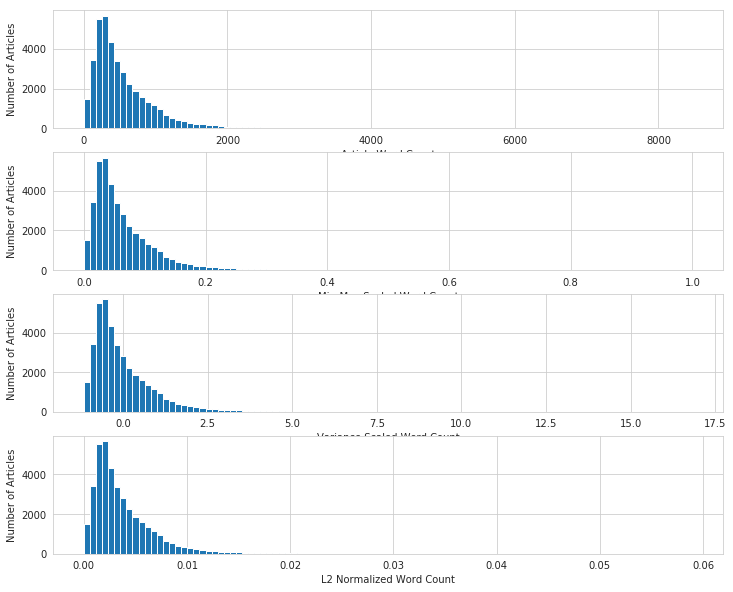

In [10]:
# Visualizing the histograms of original and scaled data

plt.figure(figsize=(12,10))

# original review count histogram
ax = plt.subplot(4,1,1)
df['n_tokens_content'].hist(ax=ax, bins=100)
ax.tick_params(labelsize=10)
ax.set_xlabel('Article Word Count', fontsize=10)
ax.set_ylabel('Number of Articles', fontsize=10)

# Scaled using min-max scaling
ax = plt.subplot(4,1,2)
df['minmax'].hist(ax=ax, bins=100)
ax.tick_params(labelsize=10)
ax.set_xlabel('Min-Max Scaled Word Count', fontsize=10)
ax.set_ylabel('Number of Articles', fontsize=10)

# Scaled using the Variance Scaling or Standardization
ax = plt.subplot(4,1,3)
df['standardized'].hist(ax=ax, bins=100)
ax.tick_params(labelsize=10)
ax.set_xlabel('Variance Scaled Word Count', fontsize=10)
ax.set_ylabel('Number of Articles', fontsize=10)

# Scaled using the L2 Normalization
ax = plt.subplot(4,1,4)
df['l2_normalized'].hist(ax=ax, bins=100)
ax.tick_params(labelsize=10)
ax.set_xlabel('L2 Normalized Word Count', fontsize=10)
ax.set_ylabel('Number of Articles', fontsize=10)